### Team Name: Runtime Terror
### Team ID: D2218

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline
import math
import random
import warnings
import plotly.io as pio
import kaleido
warnings.filterwarnings('ignore')

#color pallette
cnf = '#393e46'
dth = '#ff2e63'
rec = '#21bf73'
act = '#fe9801'

In [1]:
#!pip install kaleido

In [3]:
#Created dataframe of 1st dataset :- Provisional_COVID-19_Deaths_by_Week__Sex__and_Age
by_Week_Sex_Age = pd.read_csv('Provisional_COVID-19_Deaths_by_Week__Sex__and_Age.csv', parse_dates=['Data as of'])

In [4]:
by_Week_Sex_Age.head(5) #used to see first 5 samples

,Data as of,State,MMWR Week,End Week,Sex,Age Group,Total Deaths,COVID-19 Deaths
0,2022-03-16,United States,1,01/04/2020,All Sex,All Ages,60164,0
1,2022-03-16,United States,1,01/04/2020,All Sex,Under 1 year,402,0
2,2022-03-16,United States,1,01/04/2020,All Sex,1-4 Years,79,0
3,2022-03-16,United States,1,01/04/2020,All Sex,5-14 Years,99,0
4,2022-03-16,United States,1,01/04/2020,All Sex,15-24 Years,605,0


In [5]:
#new dataframe sorted according to Sex and Age Group
All_sex_df = by_Week_Sex_Age.loc[(by_Week_Sex_Age['Sex'] == 'All Sex')&(by_Week_Sex_Age['Age Group'] == 'All Ages')]
All_sex_df = All_sex_df.reset_index(drop = True)
All_sex_df.head()

,Data as of,State,MMWR Week,End Week,Sex,Age Group,Total Deaths,COVID-19 Deaths
0,2022-03-16,United States,1,01/04/2020,All Sex,All Ages,60164,0
1,2022-03-16,United States,2,01/11/2020,All Sex,All Ages,60729,1
2,2022-03-16,United States,3,01/18/2020,All Sex,All Ages,59355,2
3,2022-03-16,United States,4,01/25/2020,All Sex,All Ages,59152,2
4,2022-03-16,United States,5,02/01/2020,All Sex,All Ages,58821,0


In [6]:
#Total sum of COVID-19 Deaths
All_sex_df['COVID-19 Deaths'].sum()

967039

In [7]:
#new dataframe sorted according to Sex=Male and Age Group =all ages
Male_df= by_Week_Sex_Age.loc[(by_Week_Sex_Age['Sex'] == 'Male')&(by_Week_Sex_Age['Age Group'] == 'All Ages')]
Male_df = Male_df.reset_index(drop = True)
Male_df.head()

,Data as of,State,MMWR Week,End Week,Sex,Age Group,Total Deaths,COVID-19 Deaths
0,2022-03-16,United States,1,01/04/2020,Male,All Ages,30925,0
1,2022-03-16,United States,2,01/11/2020,Male,All Ages,31122,0
2,2022-03-16,United States,3,01/18/2020,Male,All Ages,30332,1
3,2022-03-16,United States,4,01/25/2020,Male,All Ages,30594,1
4,2022-03-16,United States,5,02/01/2020,Male,All Ages,30196,0


In [8]:
#new dataframe sorted according to Sex=Female and Age Group =all ages
Female_df= by_Week_Sex_Age.loc[(by_Week_Sex_Age['Sex'] == 'Female')&(by_Week_Sex_Age['Age Group'] == 'All Ages')]
Female_df = Female_df.reset_index(drop = True)
Female_df.head()

,Data as of,State,MMWR Week,End Week,Sex,Age Group,Total Deaths,COVID-19 Deaths
0,2022-03-16,United States,1,01/04/2020,Female,All Ages,29239,0
1,2022-03-16,United States,2,01/11/2020,Female,All Ages,29607,1
2,2022-03-16,United States,3,01/18/2020,Female,All Ages,29023,1
3,2022-03-16,United States,4,01/25/2020,Female,All Ages,28558,1
4,2022-03-16,United States,5,02/01/2020,Female,All Ages,28625,0


In [9]:
#Combining dataframe for visualization
Combined_df_for_sex = pd.DataFrame()
Combined_df_for_sex['Date'] = All_sex_df['End Week']
Combined_df_for_sex['Male Deaths'] = Male_df['COVID-19 Deaths']
Combined_df_for_sex['Female Deaths'] = Female_df['COVID-19 Deaths']
Combined_df_for_sex['All Sex Deaths'] = All_sex_df ['COVID-19 Deaths']

In [10]:
#Combining dataframe head
Combined_df_for_sex.head()

,Date,Male Deaths,Female Deaths,All Sex Deaths
0,01/04/2020,0,0,0
1,01/11/2020,0,1,1
2,01/18/2020,1,1,2
3,01/25/2020,1,1,2
4,02/01/2020,0,0,0


In [11]:
#Shape of new dataframe
Combined_df_for_sex.shape

(115, 4)

# From the below plot we can see the peak of COVID-19 Deaths and have  insights about the waves during the pandemic

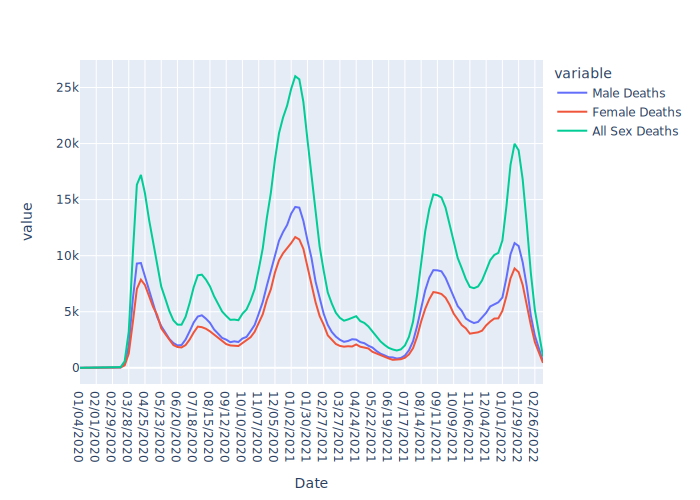

In [42]:
#Here we have plotted interactive line plot 
fig = px.line(Combined_df_for_sex, x='Date', y=["Male Deaths","Female Deaths","All Sex Deaths"])
fig.show(renderer="svg")

In [13]:
#new dataframe sorted according to Age Group == 'All Ages' &Sex = 'All Sex'
tp4= by_Week_Sex_Age.loc[(by_Week_Sex_Age['Age Group'] == 'All Ages') &(by_Week_Sex_Age['Sex'] == 'All Sex')]
tp4 = tp4.reset_index(drop = True)
tp4.head()

,Data as of,State,MMWR Week,End Week,Sex,Age Group,Total Deaths,COVID-19 Deaths
0,2022-03-16,United States,1,01/04/2020,All Sex,All Ages,60164,0
1,2022-03-16,United States,2,01/11/2020,All Sex,All Ages,60729,1
2,2022-03-16,United States,3,01/18/2020,All Sex,All Ages,59355,2
3,2022-03-16,United States,4,01/25/2020,All Sex,All Ages,59152,2
4,2022-03-16,United States,5,02/01/2020,All Sex,All Ages,58821,0


# The below plot compares COVID-19 deaths vs total deaths recorded during the data collection period

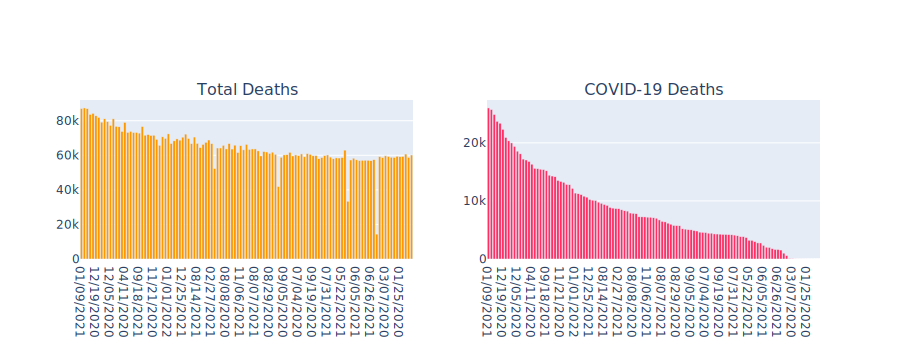

In [43]:
fig_2=px.bar(tp4,x='End Week',y='Total Deaths',color_discrete_sequence=[act])
fig_3=px.bar(tp4,x='End Week',y='COVID-19 Deaths',color_discrete_sequence=[dth])
fig = make_subplots(rows=1,cols=2,shared_xaxes=False,horizontal_spacing=0.1
                   ,subplot_titles=('Total Deaths','COVID-19 Deaths'))
fig.add_trace(fig_2['data'][0],row=1,col=1)
fig.add_trace(fig_3['data'][0],row=1,col=2)

fig.update_layout(height=350,width=900)
fig.show(renderer="svg")


In [15]:
tp4 = tp4.sort_values(by=['COVID-19 Deaths'],ascending=False)
tp4.head(5)

,Data as of,State,MMWR Week,End Week,Sex,Age Group,Total Deaths,COVID-19 Deaths
53,2022-03-16,United States,1,01/09/2021,All Sex,All Ages,87061,26007
54,2022-03-16,United States,2,01/16/2021,All Sex,All Ages,87403,25727
52,2022-03-16,United States,53,01/02/2021,All Sex,All Ages,86972,24881
55,2022-03-16,United States,3,01/23/2021,All Sex,All Ages,83675,23712
51,2022-03-16,United States,52,12/26/2020,All Sex,All Ages,84315,23385


# The following three plots visualize the age wise distribution of COVID-19 Deaths for the 3 peak weeks recorded.

In [16]:
#As per the above plot we have now found out the date at which the peak occured
#few more visual
tp5= by_Week_Sex_Age.loc[(by_Week_Sex_Age['End Week'] == '04/18/2020')]
tp5 = tp5.reset_index(drop = True)
tp5.head()

,Data as of,State,MMWR Week,End Week,Sex,Age Group,Total Deaths,COVID-19 Deaths
0,2022-03-16,United States,16,04/18/2020,All Sex,All Ages,76786,17205
1,2022-03-16,United States,16,04/18/2020,All Sex,Under 1 year,357,0
2,2022-03-16,United States,16,04/18/2020,All Sex,1-4 Years,54,0
3,2022-03-16,United States,16,04/18/2020,All Sex,5-14 Years,89,0
4,2022-03-16,United States,16,04/18/2020,All Sex,15-24 Years,613,17


In [17]:
peak1 = tp5.loc[(tp5['Sex'] == 'All Sex')]
peak1 = peak1.reset_index(drop = True)
peak1.drop([0], inplace = True)
peak1.head()

,Data as of,State,MMWR Week,End Week,Sex,Age Group,Total Deaths,COVID-19 Deaths
1,2022-03-16,United States,16,04/18/2020,All Sex,Under 1 year,357,0
2,2022-03-16,United States,16,04/18/2020,All Sex,1-4 Years,54,0
3,2022-03-16,United States,16,04/18/2020,All Sex,5-14 Years,89,0
4,2022-03-16,United States,16,04/18/2020,All Sex,15-24 Years,613,17
5,2022-03-16,United States,16,04/18/2020,All Sex,25-34 Years,1424,120


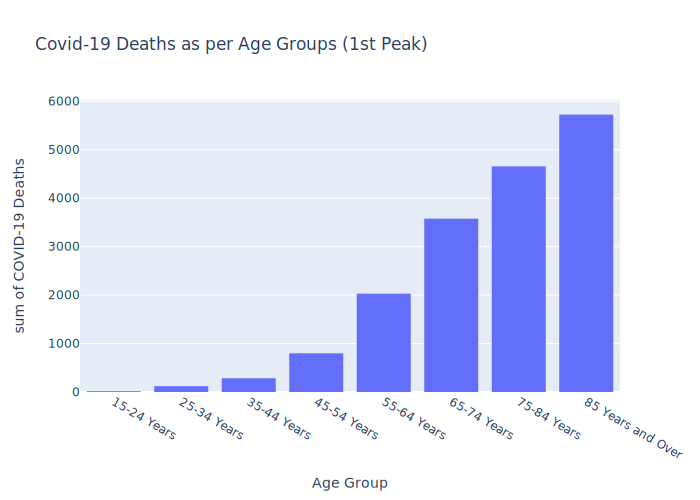

In [44]:
fig = px.histogram(peak1, x="Age Group", y="COVID-19 Deaths", title="Covid-19 Deaths as per Age Groups (1st Peak) ")
fig.update_traces(xbins_size="M1")
fig.show(renderer="svg")

In [19]:
#As per the above plot we have now found out the date at which the peak occured
#few more visual
tp3= by_Week_Sex_Age.loc[(by_Week_Sex_Age['End Week'] == '01/09/2021')]
tp3 = tp3.reset_index(drop = True)
tp3.head()

,Data as of,State,MMWR Week,End Week,Sex,Age Group,Total Deaths,COVID-19 Deaths
0,2022-03-16,United States,1,01/09/2021,All Sex,All Ages,87061,26007
1,2022-03-16,United States,1,01/09/2021,All Sex,Under 1 year,361,2
2,2022-03-16,United States,1,01/09/2021,All Sex,1-4 Years,61,4
3,2022-03-16,United States,1,01/09/2021,All Sex,5-14 Years,91,4
4,2022-03-16,United States,1,01/09/2021,All Sex,15-24 Years,657,32


In [20]:
peak2 = tp3.loc[(tp3['Sex'] == 'All Sex')]
peak2 = peak2.reset_index(drop = True)
peak2.drop([0], inplace = True)
peak2.head()

,Data as of,State,MMWR Week,End Week,Sex,Age Group,Total Deaths,COVID-19 Deaths
1,2022-03-16,United States,1,01/09/2021,All Sex,Under 1 year,361,2
2,2022-03-16,United States,1,01/09/2021,All Sex,1-4 Years,61,4
3,2022-03-16,United States,1,01/09/2021,All Sex,5-14 Years,91,4
4,2022-03-16,United States,1,01/09/2021,All Sex,15-24 Years,657,32
5,2022-03-16,United States,1,01/09/2021,All Sex,25-34 Years,1572,168


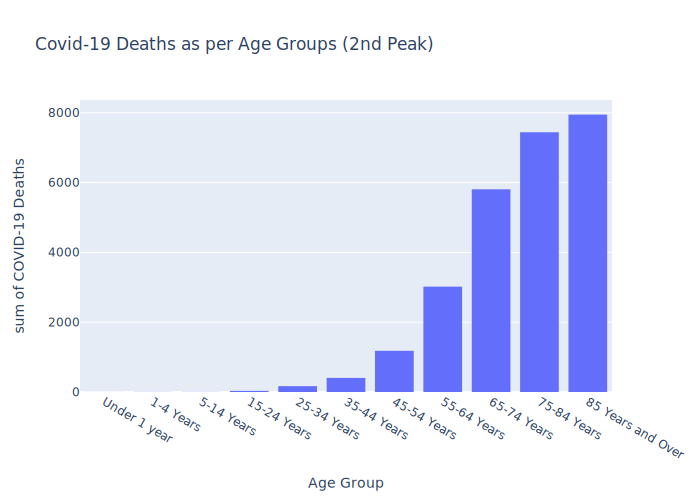

In [45]:
fig = px.histogram(peak2, x="Age Group", y="COVID-19 Deaths", title="Covid-19 Deaths as per Age Groups (2nd Peak)")
fig.update_traces(xbins_size="M1")
fig.show(renderer="svg")

In [22]:
#As per the above plot we have now found out the date at which the peak occured
#few more visual
tp6= by_Week_Sex_Age.loc[(by_Week_Sex_Age['End Week'] == '01/22/2022')]
tp6 = tp6.reset_index(drop = True)
tp6.head()

,Data as of,State,MMWR Week,End Week,Sex,Age Group,Total Deaths,COVID-19 Deaths
0,2022-03-16,United States,3,01/22/2022,All Sex,All Ages,81144,19982
1,2022-03-16,United States,3,01/22/2022,All Sex,Under 1 year,326,6
2,2022-03-16,United States,3,01/22/2022,All Sex,1-4 Years,61,6
3,2022-03-16,United States,3,01/22/2022,All Sex,5-14 Years,83,7
4,2022-03-16,United States,3,01/22/2022,All Sex,15-24 Years,601,45


In [23]:
peak3 = tp6.loc[(tp3['Sex'] == 'All Sex')]
peak3 = peak3.reset_index(drop = True)
peak3.drop([0], inplace = True)
peak3.head()

,Data as of,State,MMWR Week,End Week,Sex,Age Group,Total Deaths,COVID-19 Deaths
1,2022-03-16,United States,3,01/22/2022,All Sex,Under 1 year,326,6
2,2022-03-16,United States,3,01/22/2022,All Sex,1-4 Years,61,6
3,2022-03-16,United States,3,01/22/2022,All Sex,5-14 Years,83,7
4,2022-03-16,United States,3,01/22/2022,All Sex,15-24 Years,601,45
5,2022-03-16,United States,3,01/22/2022,All Sex,25-34 Years,1416,199


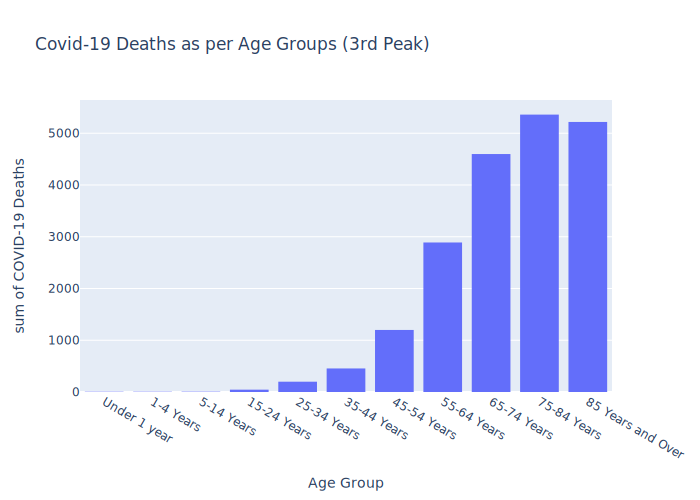

In [46]:
fig = px.histogram(peak3, x="Age Group", y="COVID-19 Deaths", title="Covid-19 Deaths as per Age Groups (3rd Peak)")
fig.update_traces(xbins_size="M1")
fig.show(renderer="svg")

In [25]:
#Created dataframe of 2nd dataset :- Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2022
ccd=pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2022.csv')
ccd.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,03/13/2022,01/01/2020,03/12/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1266.0,1323.0,NaN
1,03/13/2022,01/01/2020,03/12/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5321.0,5520.0,NaN
2,03/13/2022,01/01/2020,03/12/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,14036.0,14589.0,NaN
3,03/13/2022,01/01/2020,03/12/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,34981.0,36298.0,NaN
4,03/13/2022,01/01/2020,03/12/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,76305.0,78962.0,NaN


In [26]:
# Seperating the dataset by group and state for furthure processing.
cc1= ccd.loc[(ccd['Group'] == 'By Total') & (ccd['State'] == 'United States')]
cc1 = cc1.drop(['Data As Of','Year','Month','ICD10_codes','Flag','Number of Mentions'],axis=1)
cc1['COVID-19 Deaths'] = cc1['COVID-19 Deaths'].fillna(0)
cc1 = cc1.reset_index(drop = True)
cc1.head()

,Start Date,End Date,Group,State,Condition Group,Condition,Age Group,COVID-19 Deaths
0,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Influenza and pneumonia,0-24,1266.0
1,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Influenza and pneumonia,25-34,5321.0
2,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Influenza and pneumonia,35-44,14036.0
3,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Influenza and pneumonia,45-54,34981.0
4,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Influenza and pneumonia,55-64,76305.0


In [27]:
cc2 = cc1.loc[(cc1['Age Group'] == 'All Ages') ]
cc2 = cc2.reset_index(drop = True)
cc2.head()

,Start Date,End Date,Group,State,Condition Group,Condition,Age Group,COVID-19 Deaths
0,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Influenza and pneumonia,All Ages,471396.0
1,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Chronic lower respiratory diseases,All Ages,84146.0
2,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Adult respiratory distress syndrome,All Ages,99786.0
3,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Respiratory failure,All Ages,378185.0
4,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Respiratory arrest,All Ages,19669.0


In [28]:
cc = cc= ccd.loc[(ccd['Group'] == 'By Total') & (ccd['State'] == 'United States')]
cc = cc.drop(['Data As Of','Year','Month','ICD10_codes','Flag'],axis=1)
cc['COVID-19 Deaths'] = cc['COVID-19 Deaths'].fillna(0)
cc = cc.reset_index(drop = True)
cc.head()

ccc = cc.loc[(cc['Age Group'] == 'All Ages') & (ccd['Condition'] != 'COVID-19')]

ccc = ccc.sort_values(by=['COVID-19 Deaths'],ascending=False)
ccc = ccc.reset_index(drop = True)
ccc.head(5)


,Start Date,End Date,Group,State,Condition Group,Condition,Age Group,COVID-19 Deaths,Number of Mentions
0,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Influenza and pneumonia,All Ages,471396.0,483435.0
1,01/01/2020,03/12/2022,By Total,United States,All other conditions and causes (residual),All other conditions and causes (residual),All Ages,387500.0,599840.0
2,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Respiratory failure,All Ages,378185.0,388091.0
3,01/01/2020,03/12/2022,By Total,United States,Circulatory diseases,Hypertensive diseases,All Ages,175490.0,177344.0
4,01/01/2020,03/12/2022,By Total,United States,Diabetes,Diabetes,All Ages,144600.0,145525.0


In [29]:
incidence_rate = []
for i in range(5):
    incidence_rate.append(ccc['COVID-19 Deaths'][i]/ccc['Number of Mentions'][i])
print('Top 5 Condition wise Incidence rate: ', incidence_rate)

Top 5 Condition wise Incidence rate:  [0.9750969623630892, 0.6460056014937317, 0.97447505868469, 0.9895457416095272, 0.9936437038309569]


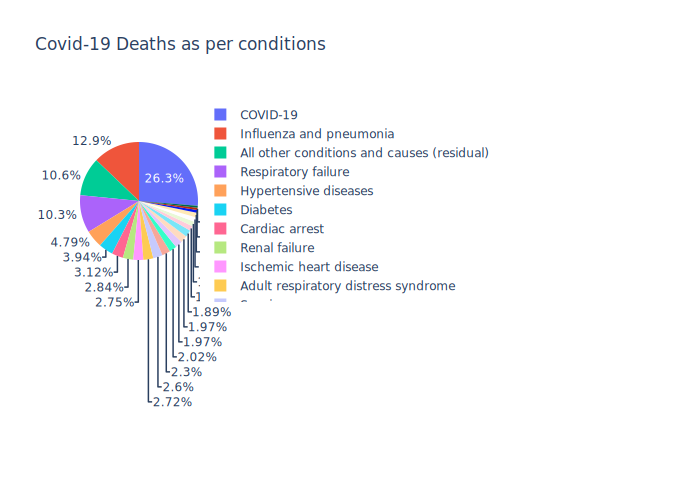

In [47]:
fig = px.pie(cc2, values='COVID-19 Deaths', names='Condition', title='Covid-19 Deaths as per conditions')
fig.show()
fig.show(renderer="svg")

In [31]:
cc3 = cc1.loc[(cc1['Condition'] == 'Influenza and pneumonia') & (ccd['Age Group'] != 'All Ages') & (ccd['Age Group'] != 'Not stated')]
cc3.head()

,Start Date,End Date,Group,State,Condition Group,Condition,Age Group,COVID-19 Deaths
0,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Influenza and pneumonia,0-24,1266.0
1,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Influenza and pneumonia,25-34,5321.0
2,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Influenza and pneumonia,35-44,14036.0
3,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Influenza and pneumonia,45-54,34981.0
4,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Influenza and pneumonia,55-64,76305.0


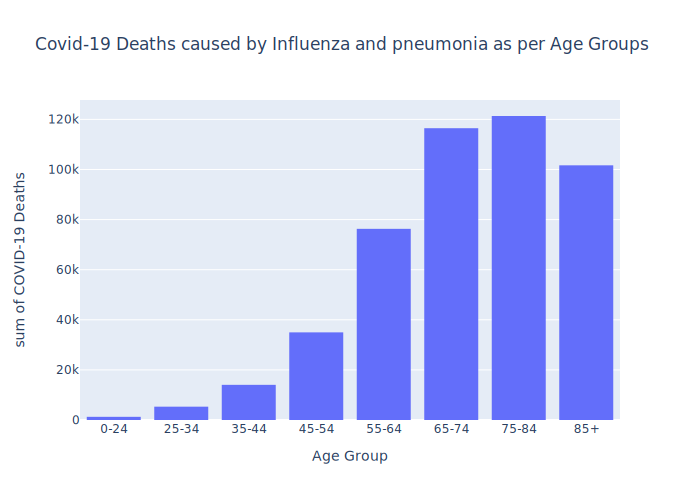

In [48]:
fig = px.histogram(cc3, x="Age Group", y="COVID-19 Deaths", title="Covid-19 Deaths caused by Influenza and pneumonia as per Age Groups")
fig.update_traces(xbins_size="M1")
fig.show(renderer="svg")

In [33]:
cc4 = cc1.loc[(cc1['Condition'] == 'Respiratory failure') & (ccd['Age Group'] != 'All Ages') & (ccd['Age Group'] != 'Not stated')]
cc4.head()

,Start Date,End Date,Group,State,Condition Group,Condition,Age Group,COVID-19 Deaths
30,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Respiratory failure,0-24,902.0
31,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Respiratory failure,25-34,3692.0
32,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Respiratory failure,35-44,10095.0
33,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Respiratory failure,45-54,26183.0
34,01/01/2020,03/12/2022,By Total,United States,Respiratory diseases,Respiratory failure,55-64,59835.0


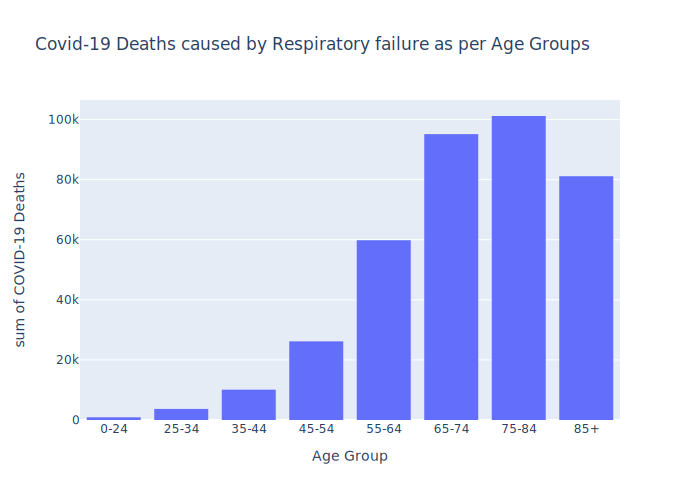

In [49]:
fig = px.histogram(cc4, x="Age Group", y="COVID-19 Deaths", title="Covid-19 Deaths caused by Respiratory failure as per Age Groups")
fig.update_traces(xbins_size="M1")
fig.show(renderer="svg")

In [35]:
cc5 = cc1.loc[(cc1['Condition'] == 'Hypertensive diseases') & (ccd['Age Group'] != 'All Ages') & (ccd['Age Group'] != 'Not stated')]
cc5.head()

,Start Date,End Date,Group,State,Condition Group,Condition,Age Group,COVID-19 Deaths
60,01/01/2020,03/12/2022,By Total,United States,Circulatory diseases,Hypertensive diseases,0-24,78.0
61,01/01/2020,03/12/2022,By Total,United States,Circulatory diseases,Hypertensive diseases,25-34,740.0
62,01/01/2020,03/12/2022,By Total,United States,Circulatory diseases,Hypertensive diseases,35-44,3109.0
63,01/01/2020,03/12/2022,By Total,United States,Circulatory diseases,Hypertensive diseases,45-54,9357.0
64,01/01/2020,03/12/2022,By Total,United States,Circulatory diseases,Hypertensive diseases,55-64,23763.0


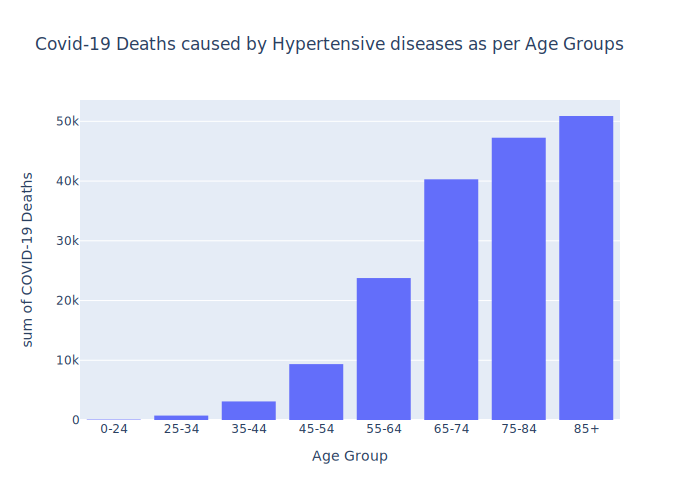

In [50]:
fig = px.histogram(cc5, x="Age Group", y="COVID-19 Deaths", title="Covid-19 Deaths caused by Hypertensive diseases as per Age Groups")
fig.update_traces(xbins_size="M1")
fig.show(renderer="svg")

In [37]:
cc6 = cc1.loc[(cc1['Condition'] == 'Diabetes') & (ccd['Age Group'] != 'All Ages') & (ccd['Age Group'] != 'Not stated')]
cc6.head()

,Start Date,End Date,Group,State,Condition Group,Condition,Age Group,COVID-19 Deaths
150,01/01/2020,03/12/2022,By Total,United States,Diabetes,Diabetes,0-24,247.0
151,01/01/2020,03/12/2022,By Total,United States,Diabetes,Diabetes,25-34,1112.0
152,01/01/2020,03/12/2022,By Total,United States,Diabetes,Diabetes,35-44,3884.0
153,01/01/2020,03/12/2022,By Total,United States,Diabetes,Diabetes,45-54,11164.0
154,01/01/2020,03/12/2022,By Total,United States,Diabetes,Diabetes,55-64,25697.0


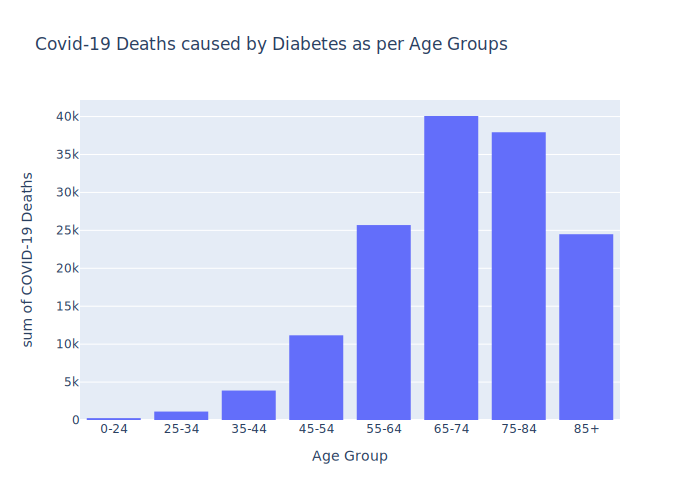

In [51]:
fig = px.histogram(cc6, x="Age Group", y="COVID-19 Deaths", title="Covid-19 Deaths caused by Diabetes as per Age Groups")
fig.update_traces(xbins_size="M1")
fig.show(renderer="svg")

In [39]:
cc7= ccd.loc[(ccd['Group'] == 'By Total') & (ccd['State'] != 'United States') & (ccd['Age Group'] == 'All Ages') & (ccd['Condition'] == 'COVID-19')]
cc7 = cc7.drop(['Data As Of','Year','Month','ICD10_codes','Flag','Number of Mentions'],axis=1)
cc7['COVID-19 Deaths'] = cc7['COVID-19 Deaths'].fillna(0)
cc7 = cc7.reset_index(drop = True)
cc7.head()

,Start Date,End Date,Group,State,Condition Group,Condition,Age Group,COVID-19 Deaths
0,01/01/2020,03/12/2022,By Total,Alabama,COVID-19,COVID-19,All Ages,18656.0
1,01/01/2020,03/12/2022,By Total,Alaska,COVID-19,COVID-19,All Ages,1185.0
2,01/01/2020,03/12/2022,By Total,Arizona,COVID-19,COVID-19,All Ages,26600.0
3,01/01/2020,03/12/2022,By Total,Arkansas,COVID-19,COVID-19,All Ages,10789.0
4,01/01/2020,03/12/2022,By Total,California,COVID-19,COVID-19,All Ages,91639.0


In [40]:
cc7.shape

(53, 8)

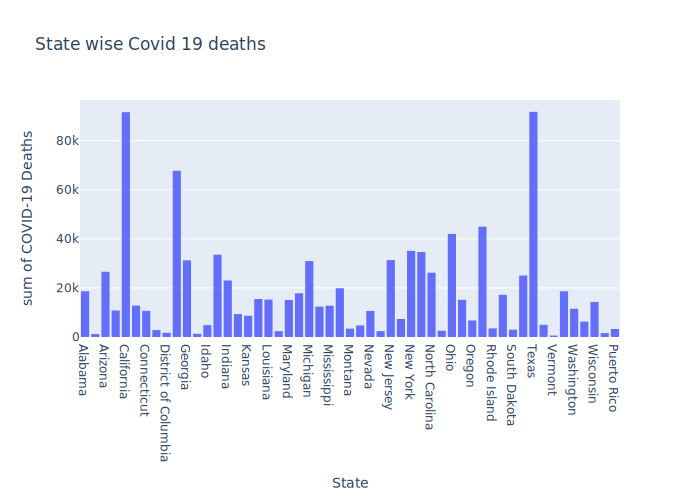

In [52]:
fig = px.histogram(cc7, x="State", y="COVID-19 Deaths", title="State wise Covid 19 deaths")
fig.update_traces(xbins_size="M1")
fig.show(renderer="svg")

# Time Series Analysis with Facebook Prophet:

In [38]:
#new dataframe created for model training
All_sex_df = by_Week_Sex_Age.loc[(by_Week_Sex_Age['Sex'] == 'All Sex')&(by_Week_Sex_Age['Age Group'] == 'All Ages')]
All_sex_df = All_sex_df.reset_index(drop = True)
All_sex_df.head()

,Data as of,State,MMWR Week,End Week,Sex,Age Group,Total Deaths,COVID-19 Deaths
0,2022-03-16,United States,1,01/04/2020,All Sex,All Ages,60164,0
1,2022-03-16,United States,2,01/11/2020,All Sex,All Ages,60729,1
2,2022-03-16,United States,3,01/18/2020,All Sex,All Ages,59355,2
3,2022-03-16,United States,4,01/25/2020,All Sex,All Ages,59152,2
4,2022-03-16,United States,5,02/01/2020,All Sex,All Ages,58821,0


In [39]:
All_sex_df.shape

(115, 8)

In [40]:
df = All_sex_df.drop(['Data as of','State','MMWR Week','Sex','Age Group','Total Deaths'],axis=1)
df.head()

,End Week,COVID-19 Deaths
0,01/04/2020,0
1,01/11/2020,1
2,01/18/2020,2
3,01/25/2020,2
4,02/01/2020,0


In [41]:
df.rename(columns = {'End Week' : 'ds', 'COVID-19 Deaths' : 'y'}, inplace = True)

In [42]:
from fbprophet import Prophet

In [43]:
m = Prophet()
model = m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
future = m.make_future_dataframe(periods=100,freq='W')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-04,6299.430247,5596.621729,18212.111526,6299.430247,6299.430247,5682.758309,5682.758309,5682.758309,5682.758309,5682.758309,5682.758309,0.0,0.0,0.0,11982.188555
1,2020-01-11,6335.346912,6017.366340,18353.717014,6335.346912,6335.346912,5618.603746,5618.603746,5618.603746,5618.603746,5618.603746,5618.603746,0.0,0.0,0.0,11953.950658
2,2020-01-18,6371.263577,5983.890181,18790.090316,6371.263577,6371.263577,6189.038978,6189.038978,6189.038978,6189.038978,6189.038978,6189.038978,0.0,0.0,0.0,12560.302555
3,2020-01-25,6407.180242,6481.266858,18920.761503,6407.180242,6407.180242,6266.223184,6266.223184,6266.223184,6266.223184,6266.223184,6266.223184,0.0,0.0,0.0,12673.403426
4,2020-02-01,6443.096907,5152.106093,17857.573723,6443.096907,6443.096907,4931.333041,4931.333041,4931.333041,4931.333041,4931.333041,4931.333041,0.0,0.0,0.0,11374.429948


In [45]:
forecast[['ds','yhat']]

,ds,yhat
0,2020-01-04,11982.188555
1,2020-01-11,11953.950658
2,2020-01-18,12560.302555
3,2020-01-25,12673.403426
4,2020-02-01,11374.429948
...,...,...
210,2024-01-07,19015.274040
211,2024-01-14,19354.226285
212,2024-01-21,19903.273579
213,2024-01-28,19466.639301


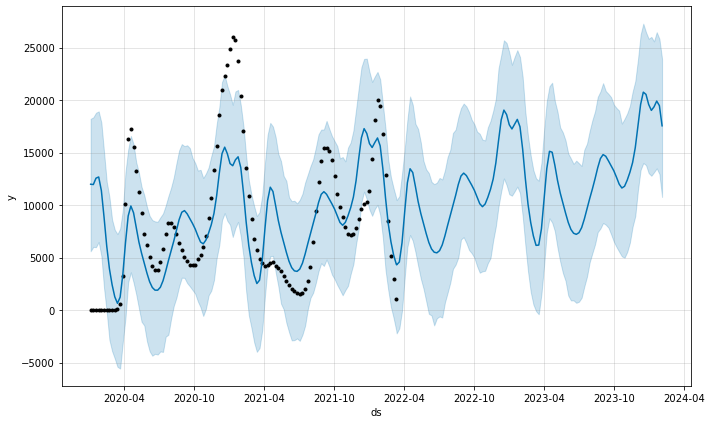

In [46]:
plot1 = m.plot(forecast)

In [67]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='115 days', period='1 day', horizon = '100 days')

INFO:fbprophet:Making 584 forecasts with cutoffs between 2020-04-28 00:00:00 and 2021-12-02 00:00:00


  0%|          | 0/584 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.

INFO:fbprophet:n_changepoints greater than number of observations. Using 24.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


In [71]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head(25)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,10 days,3.485309e+08,18668.983097,10594.289904,2.033771,1.164665,0.228670
1,11 days,4.396028e+08,20966.706526,11845.889546,2.250147,1.303145,0.211602
2,12 days,5.288063e+08,22995.787998,13053.114552,2.464069,1.397076,0.197528
3,13 days,6.180097e+08,24859.801865,14260.339558,2.677992,1.465334,0.183453
4,14 days,7.072132e+08,26593.481004,15467.564563,2.891915,1.574612,0.169393
5,15 days,1.424807e+09,37746.616795,19223.661435,3.557951,1.850238,0.151440
6,16 days,2.142640e+09,46288.654283,22991.469678,4.224285,2.088778,0.137890
7,17 days,2.859377e+09,53473.138258,26744.300597,4.888020,2.522904,0.120959
8,18 days,3.485214e+09,59035.702445,29254.137972,5.336082,2.522904,0.120818
9,19 days,4.109141e+09,64102.585409,31723.086098,5.783237,2.685703,0.120960
